In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import time
from IPython import display
import sys

In [2]:
#constants
# PHYSICAL PARAMETERS

Mj      = 8.93e22 #  kg      Io mass
Rj      = 1.82e6 #  m      Io radius
G       = 6.67e-11 #  Gravitational constant in SI units

# SIMULATION PARAMETERS
Ninit   = 1000 # Number of particles (if new object is created)
m       = Mj/Ninit # SPH particle mass 
dt      = 50 # Time step size
ball_size = Rj / (np.cbrt(Ninit) * np.sqrt(2))
print(ball_size)


128693.43417595164


In [3]:
def init_IO(n):
    
    init_state = [np.zeros([6])]
    
    while len(init_state) < n:
        if len(init_state) % 100 == 0:
            print(len(init_state))
            
        tmp_state = np.zeros([6])
        tmp_state[:3] = (np.random.rand(3) - 0.5) * Rj * 2
        
        vec = (tmp_state - init_state)
        vec = vec[:,0:3]
        distance = np.sqrt(vec[:,0] ** 2 + vec[:,1] ** 2 + vec[:,2] ** 2)  
        
        if distance[0] > Rj * 1.05:
            continue
        
        if any(np.where((distance < 2 * ball_size))[0]):
            continue
            
        init_state.append(tmp_state)
        
    
    return np.array(init_state)

def init_comet(state, moon_ratio=0.1):
    
    state = list(state)
    state.append([5e7, 0, 0, -5e5, 0, 0])

    while len(state) < int(Ninit + Ninit * moon_ratio):
        if len(state) % 100 == 0:
            print(len(state))

        tmp_state = [5e7, 0, 0, -5e5, 0, 0]
        tmp_state[:3] += (np.random.randn(3) - 0.5) * Rj #* 6 * moon_ratio
        
        vec = (tmp_state - np.array(state)[Ninit:])
        vec = vec[:,0:3]
        distance = np.sqrt(vec[:,0] ** 2 + vec[:,1] ** 2 + vec[:,2] ** 2)  
        
        if distance[0] > Rj * moon_ratio * 6:
            #print('too far away')
            continue
        
        if any(np.where((distance < 2 * ball_size))[0]):
            #print('too close to other ball')
            continue
            
        state.append(tmp_state)
        
    return np.array(state)



def new_state(state, Fi, distances):
    
    if any(np.where((distances < 2 * ball_size) & (distances > 0))[0]):

        updates = np.where((distances < 2 * ball_size) & (distances > 0))
        to_be_updated = updates[0]
        updated_with = updates[1]
        state_updates = state[updated_with]        

        for i in range(0,len(to_be_updated)):
            #state[to_be_updated[i]][3:] = state_updates[i] * 0.999
            state[to_be_updated[i]], s = collision(state[to_be_updated[i]], state_updates[i], 0.999)
    
    a = Fi / m
    
    state[:,3:] += a * dt
    state[:,0:3] += state[:,3:]
    
    return state

    
    
def gravity_n_body(state):
    
    Fi = []
    distances = []

    for i in range(0, len(state)):
        
        vec = (state[i] - state)#np.delete(state, i, axis=0))
        vec = vec[:,0:3]
        distance = np.sqrt(vec[:,0] ** 2 + vec[:,1] ** 2 + vec[:,2] ** 2)  
        distances.append(distance)
        #print(vec)
        #print((vec.transpose()/distance**3).transpose())
        Fi.append(np.sum(- G * m ** 2 * np.nan_to_num(vec.transpose()/distance**3).transpose(), axis = 0))
        
    return np.array(Fi), np.array(distances)


def collision(state1, state2, inelasticity=1):
    """
    tmp_state = np.array([state1[3:], state2[3:]])

    state1[3:] = tmp_state[1] * inelasticity
    state2[3:] = tmp_state[0] * inelasticity

    """
    state_diff = state1[0:3] - state2[0:3]
    #print(state_diff)
    n = np.nan_to_num(state_diff / len_vec(state_diff))
    #print(n, len_vec(n))
    
    v_rel = state1[3:] - state2[3:]
    #print(v_rel)
    v_norm = np.dot(v_rel, n) * n
    #print(v_norm)
    
    state1[3:] = (state1[3:] - v_norm) * inelasticity
    state2[3:] = (state2[3:] + v_norm) * inelasticity
    
    return state1, state2


    
def len_vec(vec):
    
    return np.sqrt(np.sum([i ** 2 for i in vec]))
    


In [4]:
# test collision

state = init_IO(n=Ninit)

#state = np.array([[-1.,1.,-2.,1.,-3.,1.], [2.,3.,2.,-1.,2.,-1.]])
#state = np.array([np.random.randn(6), np.random.randn(6)])
print(len_vec(abs(state[0][3:]) + abs(state[1][3:])))


print(abs(state[0][3:]) + abs(state[1][3:]))

state = collision(state[0], state[1])

print(state)
print(abs(state[0][3:]) + abs(state[1][3:]))
print(len_vec(abs(state[0][3:]) + abs(state[1][3:])))

100
100
200
200
300
400
400
400
400
400
400
400
500
500
600
700
700
700
700
700
700
800
800
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
0.0
[0. 0. 0.]
(array([0., 0., 0., 0., 0., 0.]), array([107831.01855684, -73515.68506391, 819346.60933483,      0.        ,
            0.        ,      0.        ]))
[0. 0. 0.]
0.0


In [5]:
# generate IO and comet

start_state = init_IO(n=Ninit)
print('done generating IO')
start_state = init_comet(start_state)
print('done generating comet')


100
200
200
200
200
200
200
300
300
300
400
400
400
400
400
400
500
500
500
500
500
500
500
500
500
600
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
800
800
800
800
800
800
800
800
800
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
done generating IO
done generating comet


In [6]:
# create plot states

N = 200 # animation frames
state = start_state
states = []
for i in range(0,N):
    #print(state)
    Fi, distances = gravity_n_body(state)

    state = new_state(state, Fi, distances)
    #print(state, '\n')
    states.append(np.array(state))
    #print(states)
    #print('--------------')

C:\Code\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide


In [7]:
#generate distances

distances = []

for i in range(0,len(states[0])):
    vec = (states[0][i] - states[0])#np.delete(state, i, axis=0))
    vec = vec[:,0:3]
    distance = np.sqrt(vec[:,0] ** 2 + vec[:,1] ** 2 + vec[:,2] ** 2)  
    distances.append(distance[0])
    

colors = distances
colors[Ninit:] = np.zeros([len(distances[Ninit:])])


In [1]:
# for plot testing

import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(plt.imread(path))


plt.style.use('dark_background')
# test init plot
zoom = 1e7
fig = plt.figure(figsize=(16,11))
# set up subplot grid
gridspec.GridSpec(3,3)
plt.set_cmap('OrRd')

# large subplot
ax = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=2, projection='3d')
scatters = ax.scatter(states[0][:,0], states[0][:,1], states[0][:,2], s=ball_size/10000)#, c=distances)
#scatters = ax.scatter(-1e8, 2e8, -1e8, s=ball_size/1.3, alpha=0.8)#, c=distances)
ab = AnnotationBbox(getImage(r'C:\Code\ATP\UDKBA\Ad_hoc_opgaver\Test\planet_sim\Planet-asteroid-interaction\jupiter.jpg'), (0, 0), frameon=False)
at = ax.add_artist(ab)
at.zorder = 0

# small subplot 1
ax2 = plt.subplot2grid((2,3), (0,2))
vel_hist = ax2.hist(np.sqrt(states[0][:,3] ** 2 + states[0][:,4] ** 2 + states[0][:,5] ** 2) / dt , bins=np.linspace(0,1.5e6,51) / dt)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# small subplot 2
plt.subplot2grid((2,3), (1,2))
plt.hist(m * (states[0][:,3] ** 2 + states[0][:,4] ** 2 + states[0][:,5] ** 2), bins=np.linspace(0,1.2e32,51))

# small subplot 3
#plt.subplot2grid((3,3), (2,2))
#plt.hist(np.sqrt(states[0][:,3] ** 2 + states[0][:,4] ** 2 + states[0][:,5] ** 2), bins=np.linspace(0,1.2e32,51))

#
#ax.view_init(elev=90, azim=0) # view x-y
#ax.view_init(elev=0, azim=0) # view y-z
#ax.view_init(elev=0, azim=90) # view x-z

scatters = ax.scatter(states[0][:,0], states[0][:,1], states[0][:,2], s=ball_size/10000, c=distances)

    
ax.view_init(elev=30, azim=-60)
#ax.plot_surface(img_x * 5, img_y * 5, img_z, rstride=10, cstride=10, facecolors=img)
#scatters = ax.scatter(states[0][:,0], states[0][:,1], states[0][:,2], s=ball_size/10000, c=distances)



# Setting the axes properties
ax.set_xlim3d(-3*zoom, 3*zoom)
ax.set_ylim3d(-3*zoom, 3*zoom)
ax.set_zlim3d(-3*zoom, 3*zoom)

ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

NameError: name 'plt' is not defined

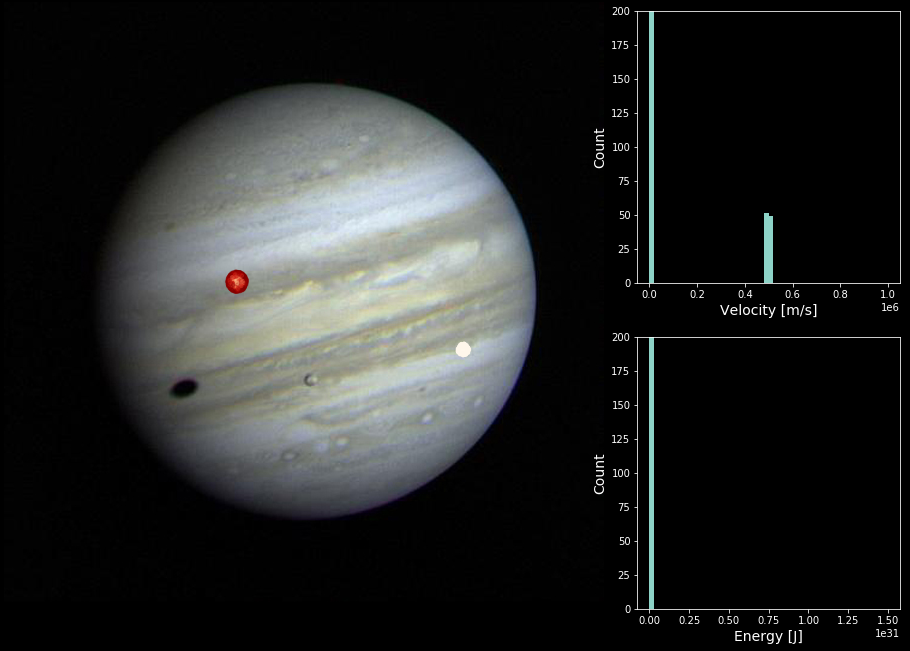

Wall time: 2min 18s


In [28]:
%%time
# Generate the animation

plt.style.use('dark_background')
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation, axes
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


def getImage(path):
    return OffsetImage(plt.imread(path))


# test init plot
fig = plt.figure(figsize=(16,11))
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot
ax1 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=2, projection='3d')
ab = AnnotationBbox(getImage(r'C:\Code\ATP\UDKBA\Ad_hoc_opgaver\Test\planet_sim\Planet-asteroid-interaction\jupiter.jpg'), (0, 0), frameon=False)
at = ax1.add_artist(ab)
at.zorder = 0
scatters = ax1.scatter(states[0][:,0], states[0][:,1], states[0][:,2], s=ball_size/10000, c=distances, cmap='OrRd')


# small subplot 1
ax2 = plt.subplot2grid((2,3), (0,2))
vel_hist = ax2.hist(np.sqrt(states[0][:,3] ** 2 + states[0][:,4] ** 2 + states[0][:,5] ** 2), bins=np.linspace(0,1e6,51))
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# small subplot 2
ax3 = plt.subplot2grid((2,3), (1,2))
e_hist = ax3.hist(m * (states[0][:,3] ** 2 + states[0][:,4] ** 2 + states[0][:,5] ** 2), bins=np.linspace(0,1.5e31,51))



def update(states):
    
    # update 3d plot
    #ax1.add_artist(ab, zorder=0)
    scatters._offsets3d = (states[:,0], states[:,1], states[:,2])
    
    # update histograms
    ax2.cla()
    ax2.set_ylim(0,Ninit/5)
    vel_hist = ax2.hist(np.sqrt(states[:,3] ** 2 + states[:,4] ** 2 + states[:,5] ** 2), bins=np.linspace(0,1e6,51))
    ax2.set_xlabel("Velocity [m/s]",fontsize=14)
    ax2.set_ylabel("Count",fontsize=14)
    ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    ax3.cla()
    ax3.set_ylim(0,Ninit/5)
    e_hist = ax3.hist(m * (states[:,3] ** 2 + states[:,4] ** 2 + states[:,5] ** 2), bins=np.linspace(0,1.5e31,51))
    ax3.set_xlabel("Energy [J]",fontsize=14)
    ax3.set_ylabel("Count",fontsize=14)

    return scatters



zoom = 1e7   
ax1.view_init(elev=30, azim=-60)


# Setting the axes properties
ax1.set_xlim3d(-1.5*zoom, 4.5*zoom)
ax1.set_ylim3d(-3*zoom, 3*zoom)
ax1.set_zlim3d(-3*zoom, 3*zoom)

ax1.set_xlabel("X [m]",fontsize=14)
ax1.set_ylabel("Y [m]",fontsize=14)
ax1.set_zlabel("Z [m]",fontsize=14)

# make the panes transparent
ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax1.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax1.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax1.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax2.set_ylim(0,Ninit/5)
ax2.set_xlabel("Velocity [m/s]",fontsize=14)
ax2.set_ylabel("Count",fontsize=14)
ax2.ticklabel_format(style='sci')

ax3.set_ylim(0,Ninit/5)
ax3.set_xlabel("Energy [J]",fontsize=14)
ax3.set_ylabel("Count",fontsize=14)

writer = animation.writers['ffmpeg'](fps=20)
ani = animation.FuncAnimation(fig, update, states, interval=50, blit=False)
ani.save('matplot003.mp4', writer=writer)
plt.show()